![logo](Data/logo.png)

# Working with Function

A function is a block of code which only runs when it is called.
You can pass data, known as parameters, into a function.
A function can return data as a result.

In [1]:
def MyFunction(x):
    return 2*x

print(MyFunction(2))

4


function can also be defined with a `one line` format using the `lambda` formulation

In [2]:
MyFunction = lambda x, y, z : x + y + z
print(MyFunction(5, 6, 2)) 

13


# Working with Class

Classes provide a means of bundling data and functionality together. Creating a new class creates a new type of object, allowing new instances of that type to be made. Each class instance can have attributes attached to it for maintaining its state. Class instances can also have function (defined by its class) for modifying its state. see [here](https://docs.python.org/3/tutorial/classes.html) for more details

example of a class named person that has 2 states variables `name` and `age` and a method that can print both variables.

The `__init__` function is used to defined the state variable of the class instance.
The `self` parameter is a reference to the current instance of the class, and is used to access variables that belongs to the class.

In [3]:
class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age

  def sayHello(self):
    print('Hello my name is {:s}. I am {:d} years old'.format(self.name, self.age))
      
  def incrAge(self,incr):
        self.age += incr
      

p1 = Person("John", 36)
p1.sayHello()
p1.incrAge(2)
p1.sayHello()


Hello my name is John. I am 36 years old
Hello my name is John. I am 38 years old


Another example showing how you can use class to load data. We want here to create a class that can load weather station data stored in `/data/IMFSE/PythonCourse/WeatherStation/SPE00156000.csv` 
data is coming from [here](https://www.ncei.noaa.gov/access/search/data-search/daily-summaries?stations=SPE00156000&pageNum=1), the weather staion is located in the  university area of Barcelona, where is UPC campus North.

In [124]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime

class WeatherStation:
    def __init__(self, filename):
        self.df = pd.read_csv(filename)
        self.filename = filename

        self.clean()
    
    def clean(self):
        df = self.df[['DATE','PRCP', 'TMAX', 'TMIN']] # local copy

        #set class var
        self.loc = self.df['LONGITUDE'].iloc[0], self.df['LATITUDE'].iloc[0]  
        self.name = self.df['STATION'].iloc[0]
        self.elevation = self.df['ELEVATION'].iloc[0]

        #convert date string to datetime object
        date = pd.to_datetime(df['DATE'])
        df = df.drop('DATE', axis=1)
        df.loc[:,'DATE'] = date

        #conversion to C
        df.loc[:,'TMAX'] = df['TMAX']/10
        df.loc[:,'TMIN'] = df['TMIN']/10
        
        #update df with clean version where we remove NaN value
        self.df = df.dropna()
        
    def extract(self,day):
        return self.df[self.df['DATE']==day]
        


In [125]:
filename = '/data/IMFSE/PythonCourse/WeatherStation/SPE00156000.csv'
bcnWs = WeatherStation(filename)

#extart data for one specific day
day = pd.to_datetime('2022-6-22')
bcnWs.extract(day)

,PRCP,TMAX,TMIN,DATE
5033,15.0,29.1,19.8,2022-06-22


<Axes: xlabel='DATE'>

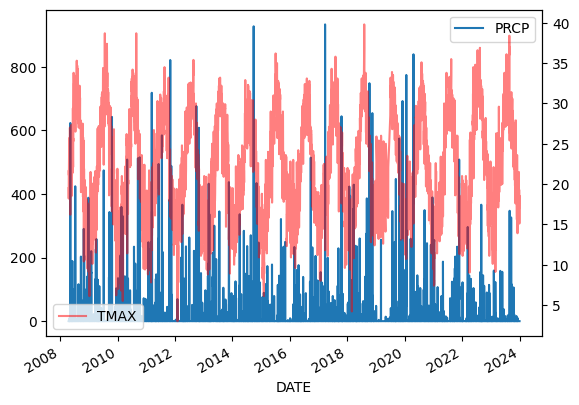

In [127]:
ax = plt.subplot(111)
bcnWs.df.plot(x='DATE',y='PRCP',ax=ax)

bx = ax.twinx()
bcnWs.df.plot(x='DATE',y='TMAX',ax=bx, c='r', alpha=0.5)
